In [ ]:
!export HTTP_PROXY="http://10.68.69.53:80"
!export HTTPS_PROXY="http://10.68.69.53:80"

!export http_proxy="http://10.68.69.53:80"
!export https_proxy="http://10.68.69.53:80"

In [ ]:
import sys

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sys.path.append("/content/drive/My Drive/eva6/assignment_7/")


In [ ]:
!pip install git+https://github.com/albumentations-team/albumentations.git

  Cloning https://github.com/albumentations-team/albumentations.git to /tmp/pip-req-build-slz5duv6
  Running command git clone -q https://github.com/albumentations-team/albumentations.git /tmp/pip-req-build-slz5duv6
  Created wheel for albumentations: filename=albumentations-1.0.0-cp37-none-any.whl size=98151 sha256=6962377886406e631b73ab50d5fb5002337744c4fd35ef6a97cba9c3e6c7e946
  Stored in directory: /tmp/pip-ephem-wheel-cache-sozfzjwc/wheels/e2/85/3e/2a40fac5cc1f43ced656603bb2fca1327b30ec7de1b1b66517
Successfully built albumentations
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
import torch
from src.dataLoader import Loader
from src.plots import Plots
from src.model import Model_loader
from src.optimise import learner

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

In [ ]:
BATCH_SIZE=128

In [ ]:
loader = Loader(batch_size=BATCH_SIZE)
train_transform,test_transform = loader.transform()
train_data,test_data = loader.Loader(train_transform,test_transform, cuda=False)


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


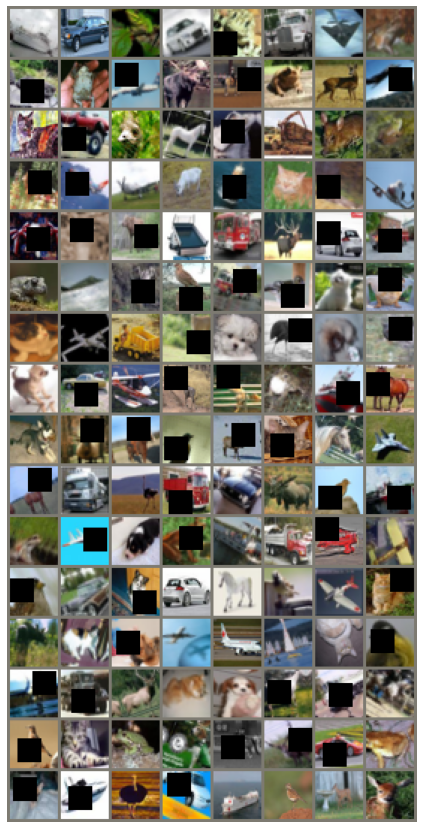

In [ ]:
Plots.sampleVisual(train_data)

In [ ]:
use_cuda = torch.cuda.is_available()
device = 'cuda:0' if use_cuda else 'cpu'

In [ ]:
model = Model_loader.models(device)
(ln_train_acc, ln_train_losses, ln_test_acc, ln_test_losses), ln_model= learner(model, train_data, test_data,2, device)

  0%|          | 0/391 [00:00<?, ?it/s]torch.Size([2, 128, 1, 1])
256
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             448
              ReLU-2           [-1, 16, 30, 30]               0
       BatchNorm2d-3           [-1, 16, 30, 30]              32
            Conv2d-4           [-1, 32, 28, 28]           4,640
              ReLU-5           [-1, 32, 28, 28]               0
       BatchNorm2d-6           [-1, 32, 28, 28]              64
            Conv2d-7           [-1, 32, 26, 26]             320
            Conv2d-8          [-1, 128, 26, 26]           4,224
              ReLU-9          [-1, 128, 26, 26]               0
AdaptiveAvgPool2d-10            [-1, 128, 1, 1]               0
Total params: 9,728
Trainable params: 9,728
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forwar

KeyboardInterrupt: 

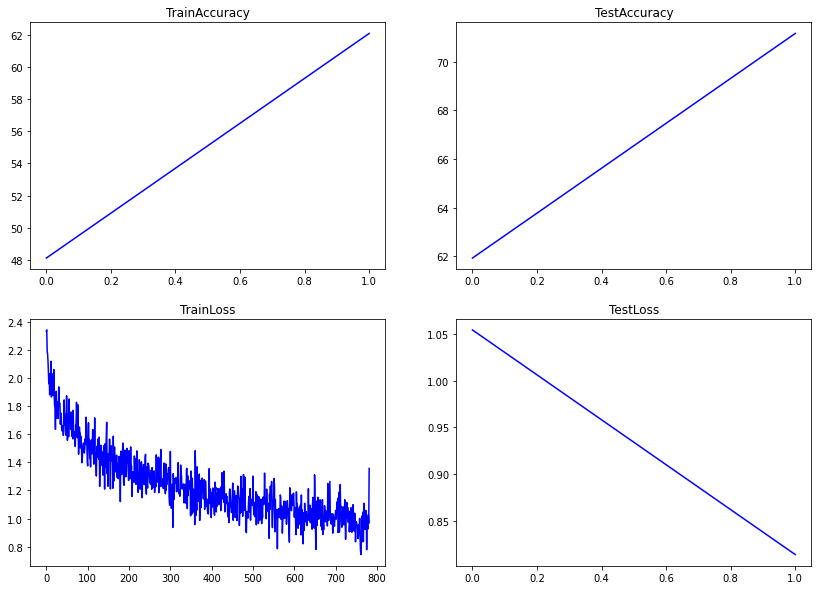

In [ ]:
Plots.stat_graph(ln_train_acc, ln_train_losses, ln_test_acc, ln_test_losses)

In [ ]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_data:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = ln_model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 84 %
Accuracy of   car : 87 %
Accuracy of  bird : 58 %
Accuracy of   cat : 44 %
Accuracy of  deer : 63 %
Accuracy of   dog : 46 %
Accuracy of  frog : 78 %
Accuracy of horse : 82 %
Accuracy of  ship : 79 %
Accuracy of truck : 83 %


In [ ]:
Plots.miscImages(ln_model,test_data,device)

NameError: ignored